In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

%matplotlib inline

/home/pui-user/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
data = pd.read_csv('data_spotify_v2.csv', index_col= 0)
print(data.shape)
print(data.columns.values)
data.head(5)

(1669, 42)
['acousticness_avg' 'acousticness_std' 'artist_genres'
 'artist_popularity_avg' 'artist_popularity_std' 'danceability_avg'
 'danceability_std' 'duration_ms_avg' 'duration_ms_std' 'energy_avg'
 'energy_std' 'first_update' 'followers' 'instrumentalness_avg'
 'instrumentalness_std' 'is_collaborative' 'is_public' 'key_avg' 'key_std'
 'last_update' 'liveness_avg' 'liveness_std' 'loudness_avg' 'loudness_std'
 'mode_avg' 'mode_std' 'num_of_artists' 'num_of_markets_avg' 'num_of_songs'
 'playlist_name_length' 'song_duration_avg' 'song_duration_std'
 'song_popularity_avg' 'song_popularity_std' 'speechiness_avg'
 'speechiness_std' 'tempo_avg' 'tempo_std' 'time_signature_avg'
 'time_signature_std' 'valence_avg' 'valence_std']


,acousticness_avg,acousticness_std,artist_genres,artist_popularity_avg,artist_popularity_std,danceability_avg,danceability_std,duration_ms_avg,duration_ms_std,energy_avg,...,song_popularity_avg,song_popularity_std,speechiness_avg,speechiness_std,tempo_avg,tempo_std,time_signature_avg,time_signature_std,valence_avg,valence_std
0,0.201550,0.210138,35,89.831579,5.489996,0.672320,0.131615,207939.980000,31152.236684,0.657740,...,80.220000,16.306183,0.080678,0.050808,120.039820,27.196016,4.000000,0.200000,0.419074,0.182246
1,0.166715,0.199305,26,86.978261,9.056559,0.748429,0.133955,213376.040816,40248.254855,0.627816,...,71.960000,20.083785,0.225245,0.134817,128.362633,29.037111,4.020408,0.246593,0.450592,0.208395
2,0.115828,0.128663,60,68.231481,16.317797,0.608870,0.146127,200221.962963,45993.631187,0.767889,...,56.714286,22.988906,0.061541,0.041325,125.398907,25.782681,3.888889,0.566558,0.368354,0.202621
3,0.237346,0.209753,25,79.058824,12.442671,0.630980,0.127485,227396.918367,43566.385885,0.543082,...,62.367347,15.297984,0.127398,0.102994,115.759082,29.865996,3.918367,0.528252,0.434865,0.191858
4,0.049196,0.124658,70,72.625000,9.734993,0.530340,0.120331,221541.943396,28843.710922,0.787226,...,59.415094,10.342136,0.063791,0.049612,126.416849,25.883036,3.905660,0.445699,0.508849,0.204985


In [19]:
data.shape

(1669, 42)

In [20]:
data.dropna(how='any', inplace= True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 1668
Data columns (total 42 columns):
acousticness_avg         1669 non-null float64
acousticness_std         1669 non-null float64
artist_genres            1669 non-null int64
artist_popularity_avg    1669 non-null float64
artist_popularity_std    1669 non-null float64
danceability_avg         1669 non-null float64
danceability_std         1669 non-null float64
duration_ms_avg          1669 non-null float64
duration_ms_std          1669 non-null float64
energy_avg               1669 non-null float64
energy_std               1669 non-null float64
first_update             1669 non-null float64
followers                1669 non-null int64
instrumentalness_avg     1669 non-null float64
instrumentalness_std     1669 non-null float64
is_collaborative         1669 non-null int64
is_public                1669 non-null int64
key_avg                  1669 non-null float64
key_std                  1669 non-null float64
last_upd

In [22]:
# Dropping features that present zero variance
data.drop(['is_collaborative', 'is_public'], axis =1 , inplace= True)

In [23]:
#scaler = MinMaxScaler().fit(data)

#data1 = scaler.transform(data)

#data1 = pd.DataFrame(data1, columns= data.columns)

data1 = data.copy()

In [24]:
data1.head()

,acousticness_avg,acousticness_std,artist_genres,artist_popularity_avg,artist_popularity_std,danceability_avg,danceability_std,duration_ms_avg,duration_ms_std,energy_avg,...,song_popularity_avg,song_popularity_std,speechiness_avg,speechiness_std,tempo_avg,tempo_std,time_signature_avg,time_signature_std,valence_avg,valence_std
0,0.201550,0.210138,35,89.831579,5.489996,0.672320,0.131615,207939.980000,31152.236684,0.657740,...,80.220000,16.306183,0.080678,0.050808,120.039820,27.196016,4.000000,0.200000,0.419074,0.182246
1,0.166715,0.199305,26,86.978261,9.056559,0.748429,0.133955,213376.040816,40248.254855,0.627816,...,71.960000,20.083785,0.225245,0.134817,128.362633,29.037111,4.020408,0.246593,0.450592,0.208395
2,0.115828,0.128663,60,68.231481,16.317797,0.608870,0.146127,200221.962963,45993.631187,0.767889,...,56.714286,22.988906,0.061541,0.041325,125.398907,25.782681,3.888889,0.566558,0.368354,0.202621
3,0.237346,0.209753,25,79.058824,12.442671,0.630980,0.127485,227396.918367,43566.385885,0.543082,...,62.367347,15.297984,0.127398,0.102994,115.759082,29.865996,3.918367,0.528252,0.434865,0.191858
4,0.049196,0.124658,70,72.625000,9.734993,0.530340,0.120331,221541.943396,28843.710922,0.787226,...,59.415094,10.342136,0.063791,0.049612,126.416849,25.883036,3.905660,0.445699,0.508849,0.204985


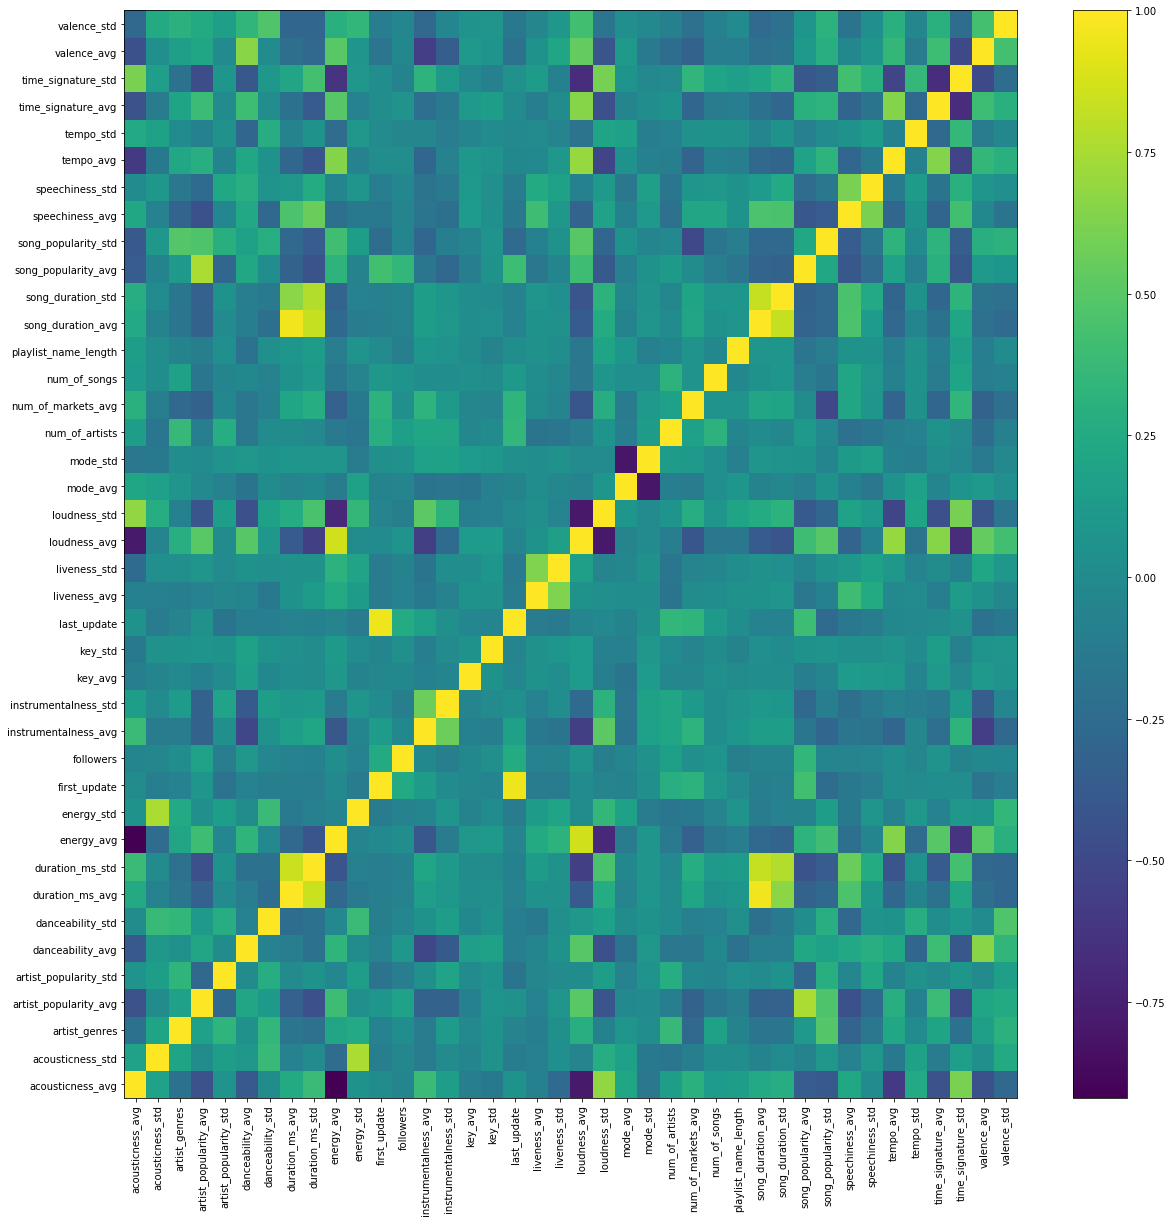

In [25]:
data2 = data1.corr()
plt.figure(figsize= (20,20))
plt.pcolor(data2)
plt.yticks(np.arange(0.5, len(data2.index), 1), data2.index)
plt.xticks(np.arange(0.5, len(data2.columns), 1), data2.columns, rotation = 90)
plt.colorbar()

In [26]:
print('correlation of num of followers with other variables: ', data2['followers'])

('correlation of num of followers with other variables: ', acousticness_avg        -0.045700
acousticness_std        -0.033745
artist_genres            0.019638
artist_popularity_avg    0.188133
artist_popularity_std   -0.113067
danceability_avg         0.099056
danceability_std        -0.041406
duration_ms_avg         -0.064743
duration_ms_std         -0.081939
energy_avg               0.025317
energy_std              -0.068110
first_update             0.247618
followers                1.000000
instrumentalness_avg    -0.022965
instrumentalness_std    -0.099799
key_avg                 -0.019788
key_std                  0.035601
last_update              0.252990
liveness_avg            -0.074864
liveness_std            -0.063847
loudness_avg             0.068744
loudness_std            -0.098970
mode_avg                -0.046275
mode_std                 0.042740
num_of_artists           0.157821
num_of_markets_avg       0.036694
num_of_songs             0.072532
playlist_name_length   

We can see that the correlation of the number of followers is very low with all other variables

In [51]:
data3 = data1.copy()

In [52]:
data3['followers'] = np.log(1 + data3['followers'])

In [53]:
print('correlation of log of followers with other variables: \n', data3.corr()['followers'])

('correlation of log of followers with other variables: \n', acousticness_avg         0.034465
acousticness_std        -0.147682
artist_genres           -0.044709
artist_popularity_avg    0.109756
artist_popularity_std   -0.274838
danceability_avg        -0.004691
danceability_std        -0.123413
duration_ms_avg         -0.006092
duration_ms_std         -0.039058
energy_avg              -0.046161
energy_std              -0.187641
first_update             0.669878
followers                1.000000
instrumentalness_avg     0.079302
instrumentalness_std    -0.056911
key_avg                  0.010541
key_std                 -0.017376
last_update              0.711905
liveness_avg            -0.086897
liveness_std            -0.132874
loudness_avg            -0.032210
loudness_std            -0.047277
mode_avg                -0.043815
mode_std                 0.059393
num_of_artists           0.306043
num_of_markets_avg       0.224317
num_of_songs             0.214065
playlist_name_length 

In [54]:
y = (data1['followers'])

X = data1.drop(['followers'], axis = 1)

In [55]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     8.876
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           2.52e-45
Time:                        16:44:16   Log-Likelihood:                -24607.
No. Observations:                1669   AIC:                         4.929e+04
Df Residuals:                    1629   BIC:                         4.951e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.05e+06   9.62e+05     -2.130      0.033   -3.94e+06   -1.62e+05
acousticness_avg       1.352e+05   1.96e+05      0.691      0.490   -2.49e+05    5.19e+05
acousticness_std       2.393e+04   3.25e+05      0.074      0.941   -6.14e+05    6.62e+05
artist_genres          -284.3105    662.189     -0.429      0.668   -1583.142    1014.521
artist_popularity_avg -1143.7151   2140.779     -0.534      0.593   -5342.686    3055.255
artist_popularity_std   680.5916   4127.839      0.165      0.869   -7415.840    8777.023
danceability_avg       5.665e+05   3.08e+05      1.840      0.066   -3.74e+04    1.17e+06
danceability_std        1.13e+05   7.82e+05      0.144      0.885   -1.42e+06    1.65e+06
duration_ms_avg          -1.3612      2.812     -0.484      0.628      -6.877       4.155
duration_ms_std           0.7180      0.995      0.722      0.471      -1.234       2.670
energy_avg             1.051e+05    3.7e+05      0.284      0.777   -6.21e+05    8.32e+05
energy_std             3.337e+04   6.16e+05      0.054      0.957   -1.17e+06    1.24e+06
first_update             -0.0006      0.001     -0.575      0.565      -0.002       0.001
instrumentalness_avg   6.021e+04   1.27e+05      0.475      0.635   -1.88e+05    3.09e+05
instrumentalness_std  -3.453e+04   1.92e+05     -0.180      0.857   -4.11e+05    3.41e+05
key_avg                3268.6127   2.53e+04      0.129      0.897   -4.63e+04    5.29e+04
key_std                2.903e+04   5.54e+04      0.524      0.601   -7.97e+04    1.38e+05
last_update               0.0015      0.001      1.453      0.146      -0.001       0.004
liveness_avg          -3.864e+05   3.83e+05     -1.010      0.313   -1.14e+06    3.64e+05
liveness_std           2.523e+05   4.56e+05      0.554      0.580   -6.41e+05    1.15e+06
loudness_avg           2865.1148   1.25e+04      0.229      0.819   -2.16e+04    2.74e+04
loudness_std          -1779.2244   2.62e+04     -0.068      0.946   -5.32e+04    4.97e+04
mode_avg               2.063e+05   2.03e+05      1.018      0.309   -1.91e+05    6.04e+05
mode_std               2.223e+05   3.69e+05      0.602      0.547   -5.02e+05    9.46e+05
num_of_artists         1800.4813    624.631      2.882      0.004     575.318    3025.645
num_of_markets_avg    -5495.6106   1597.656     -3.440      0.001   -8629.287   -2361.934
num_of_songs            306.5917    272.275      1.126      0.260    -227.455     840.639
playlist_name_length  -3730.1838   2312.914     -1.613      0.107   -8266.783     806.415
song_duration_avg         1.1164      2.777      0.402      0.688      -4.331       6.564
song_duration_std        -0.3696      0.940     -0.393      0.694      -2.213       1.474
song_popularity_avg    1.644e+04   2097.925      7.836      0.000    1.23e+04    2.06e+04
song_popularity_std   -

*** The R-square value is very low. So next we try with the log of the number of followers ***

In [56]:
y2 = (data3['followers'])

X2 = data3.drop(['followers'], axis = 1)

In [57]:
X2.shape, y2.shape

((1669, 39), (1669,))

In [58]:
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     64.15
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          2.19e-296
Time:                        16:44:18   Log-Likelihood:                -3596.3
No. Observations:                1669   AIC:                             7273.
Df Residuals:                    1629   BIC:                             7489.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -50.1709      3.281    -15.292      0.000     -56.606     -43.736
acousticness_avg         -0.5296      0.667     -0.794      0.427      -1.838       0.779
acousticness_std          0.5158      1.110      0.465      0.642      -1.661       2.693
artist_genres            -0.0007      0.002     -0.328      0.743      -0.005       0.004
artist_popularity_avg    -0.0003      0.007     -0.047      0.962      -0.015       0.014
artist_popularity_std    -0.0506      0.014     -3.598      0.000      -0.078      -0.023
danceability_avg         -0.5647      1.050     -0.538      0.591      -2.624       1.494
danceability_std          6.6558      2.668      2.495      0.013       1.423      11.889
duration_ms_avg         -1.7e-05   9.59e-06     -1.773      0.076   -3.58e-05    1.81e-06
duration_ms_std         5.95e-06   3.39e-06      1.754      0.080   -7.05e-07    1.26e-05
energy_avg               -1.1135      1.263     -0.882      0.378      -3.590       1.364
energy_std               -5.5955      2.099     -2.666      0.008      -9.712      -1.479
first_update          -5.887e-09   3.36e-09     -1.753      0.080   -1.25e-08       7e-10
instrumentalness_avg     -0.1043      0.432     -0.241      0.809      -0.952       0.743
instrumentalness_std      0.8034      0.654      1.229      0.219      -0.479       2.085
key_avg                   0.1720      0.086      1.996      0.046       0.003       0.341
key_std                  -0.0531      0.189     -0.281      0.779      -0.424       0.318
last_update            4.295e-08   3.53e-09     12.153      0.000     3.6e-08    4.99e-08
liveness_avg              1.3219      1.305      1.013      0.311      -1.237       3.881
liveness_std             -3.0261      1.554     -1.948      0.052      -6.074       0.021
loudness_avg              0.0140      0.043      0.329      0.742      -0.069       0.098
loudness_std              0.1495      0.089      1.672      0.095      -0.026       0.325
mode_avg                  1.5777      0.691      2.282      0.023       0.222       2.934
mode_std                  2.3314      1.259      1.852      0.064      -0.138       4.800
num_of_artists            0.0082      0.002      3.830      0.000       0.004       0.012
num_of_markets_avg       -0.0193      0.005     -3.551      0.000      -0.030      -0.009
num_of_songs              0.0049      0.001      5.312      0.000       0.003       0.007
playlist_name_length     -0.0093      0.008     -1.180      0.238      -0.025       0.006
song_duration_avg       1.88e-05   9.47e-06      1.985      0.047    2.24e-07    3.74e-05
song_duration_std     -7.191e-06    3.2e-06     -2.244      0.025   -1.35e-05   -9.06e-07
song_popularity_avg       0.0550      0.007      7.694      0.000       0.041       0.069
song_popularity_std    

In [59]:
relevant = results.pvalues[results.pvalues < 0.005]

relevant

const                    1.979354e-49
artist_popularity_std    3.307456e-04
last_update              1.356523e-32
num_of_artists           1.329988e-04
num_of_markets_avg       3.950970e-04
num_of_songs             1.232451e-07
song_popularity_avg      2.448120e-14
song_popularity_std      2.369755e-06
speechiness_avg          1.095569e-03
dtype: float64

In [60]:
len(relevant)

9

# The variables seen here with P< 0.5 are the relevant variables. Even though the R square value is still in the range of 0.21 it is much better than the case where a log value of the number of followers was not considered

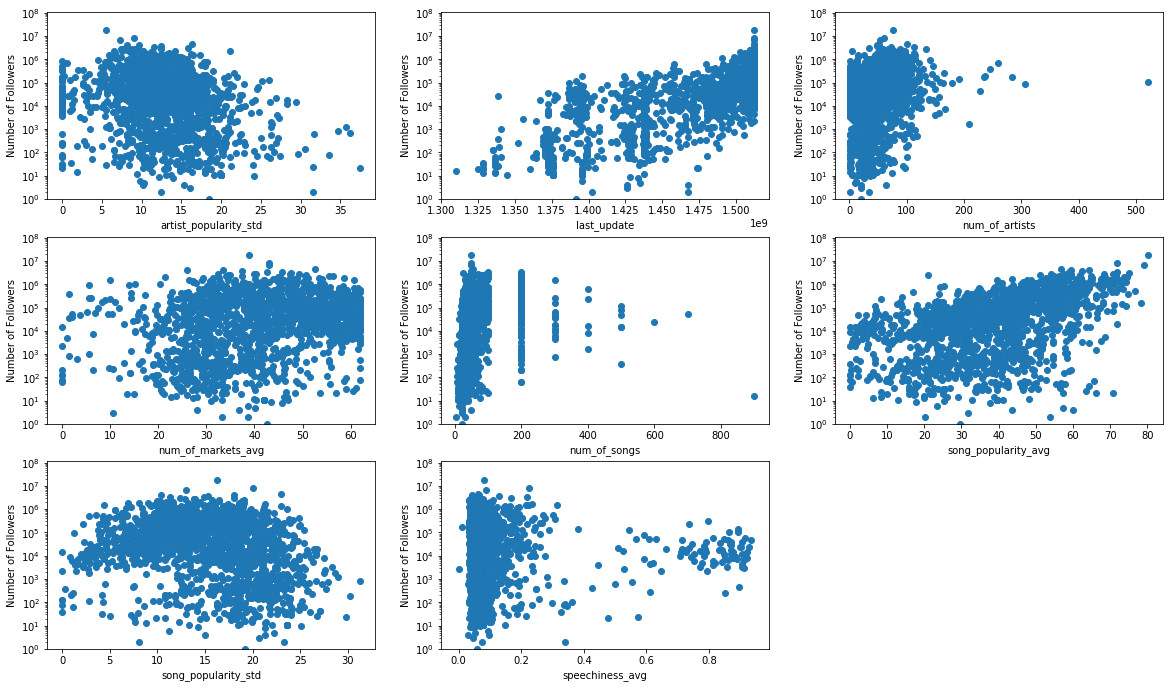

In [63]:
plt.figure(figsize=(20,20))

i=1

for r in relevant.index[1:]:
    
    plt.subplot(5,3,i)
    plt.scatter(data1[r], data1['followers'])
    plt.yscale('log')
    plt.xlabel(r)
    plt.ylabel('Number of Followers')
    plt.ylim(ymin=1)
        
    i += 1
    
    
    
    